In [1]:
import pandas as pd
k2 = pd.read_csv('./data/k2/k2.csv')
from functions import *

k2_columns = [
    'disposition',
    'rastr',
    'ra',
    'decstr',
    'dec',
    'st_teff',
    'st_rad',
    'pl_rade',
    'pl_eqt',
    'sy_dist',
    'st_logg',
    'pl_orbper',
    'pl_insol'
]

k2_data = k2[k2_columns].copy()

k2_columns_name = {
    'disposition': 'classification',
    'rastr' : 'longitude_s',
    'ra' : 'longitude',
    'decstr' : 'latitude_s',
    'dec' : 'latitude',
    'st_teff' : 'stellar_temperature',
    'st_rad' : 'stellar_radius',
    'pl_rade' : 'planet_radius',
    'pl_eqt' : 'eq_temperature',
    'sy_dist' : 'distance',
    'st_logg' : 'stellar_sur_gravity',
    'pl_orbper' : 'orbital_period',
    'pl_insol' : 'insol_flux'
}

k2_data.rename(columns=k2_columns_name, inplace=True)

k2_data.head(5)

,classification,longitude_s,longitude,latitude_s,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux
0,CONFIRMED,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,5766.00,1.08,2.578,NaN,179.4610,4.50,41.685500,NaN
1,CONFIRMED,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,5766.00,0.93,2.230,546.0,179.4610,4.50,41.685500,NaN
2,CONFIRMED,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,5703.00,0.96,2.355,NaN,179.4610,4.38,41.688644,NaN
3,CANDIDATE,12h15m23.10s,183.846245,-06d16m05.98s,-6.268329,4616.52,0.76,1.120,1054.0,97.1795,4.54,2.301830,NaN
4,CANDIDATE,12h15m23.10s,183.846245,-06d16m05.98s,-6.268329,4720.00,0.71,1.313,NaN,97.1795,4.50,2.302368,NaN


In [2]:
# def decimal_to_sexagesimal(decimal_degrees):
#     degrees = int(decimal_degrees)
#     minutes = int((decimal_degrees - degrees) * 60)
#     seconds = (decimal_degrees - degrees - minutes / 60) * 3600
#     return f"{degrees}h{minutes}m{seconds:.2f}s"

k2_data['longitude_s'] = k2_data['longitude'].apply(decimal_to_sexagesimal)
k2_data['latitude_s'] = k2_data['latitude'].apply(decimal_to_sexagesimal)

k2_data.head(5)

,classification,longitude_s,longitude,latitude_s,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux
0,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5766.00,1.08,2.578,NaN,179.4610,4.50,41.685500,NaN
1,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5766.00,0.93,2.230,546.0,179.4610,4.50,41.685500,NaN
2,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5703.00,0.96,2.355,NaN,179.4610,4.38,41.688644,NaN
3,CANDIDATE,183h50m46.48s,183.846245,-6h-16m-5.98s,-6.268329,4616.52,0.76,1.120,1054.0,97.1795,4.54,2.301830,NaN
4,CANDIDATE,183h50m46.48s,183.846245,-6h-16m-5.98s,-6.268329,4720.00,0.71,1.313,NaN,97.1795,4.50,2.302368,NaN


In [3]:
# import numpy as np

# # Constante de Stefan-Boltzmann (W/m^2K^4)
# sigma = 5.67e-8  

# # Função para calcular a luminosidade da estrela em termos de luminosidade solar
# def calculate_luminosity(stellar_radius, stellar_temperature):
#     return 4 * np.pi * (stellar_radius ** 2) * sigma * (stellar_temperature ** 4)

# # Function to calculate stellar distance in parsecs
# def calculate_stellar_distance(luminosity, insolation_flux):
#     return np.sqrt(luminosity / (4 * np.pi * insolation_flux))

# Calcular a luminosidade da estrela
luminosidade = calculate_luminosity(k2_data['stellar_radius'], k2_data['stellar_temperature'])

# Calcular a distância estelar em parsecs
k2_data['distance'] = calculate_stellar_distance(luminosidade, k2_data['insol_flux'])

k2_data.head(5)

,classification,longitude_s,longitude,latitude_s,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux
0,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5766.00,1.08,2.578,NaN,NaN,4.50,41.685500,NaN
1,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5766.00,0.93,2.230,546.0,NaN,4.50,41.685500,NaN
2,CONFIRMED,53h39m4.04s,53.651123,20h35m56.47s,20.599021,5703.00,0.96,2.355,NaN,NaN,4.38,41.688644,NaN
3,CANDIDATE,183h50m46.48s,183.846245,-6h-16m-5.98s,-6.268329,4616.52,0.76,1.120,1054.0,NaN,4.54,2.301830,NaN
4,CANDIDATE,183h50m46.48s,183.846245,-6h-16m-5.98s,-6.268329,4720.00,0.71,1.313,NaN,NaN,4.50,2.302368,NaN


In [4]:
k2_data['depth'] = transit_depth(k2_data['planet_radius'], k2_data['stellar_radius'])

In [5]:
colunas_dados_faltantes = ['stellar_temperature','stellar_radius','planet_radius','eq_temperature','distance','stellar_sur_gravity','orbital_period','insol_flux','depth']

In [6]:
import matplotlib.pyplot as plt

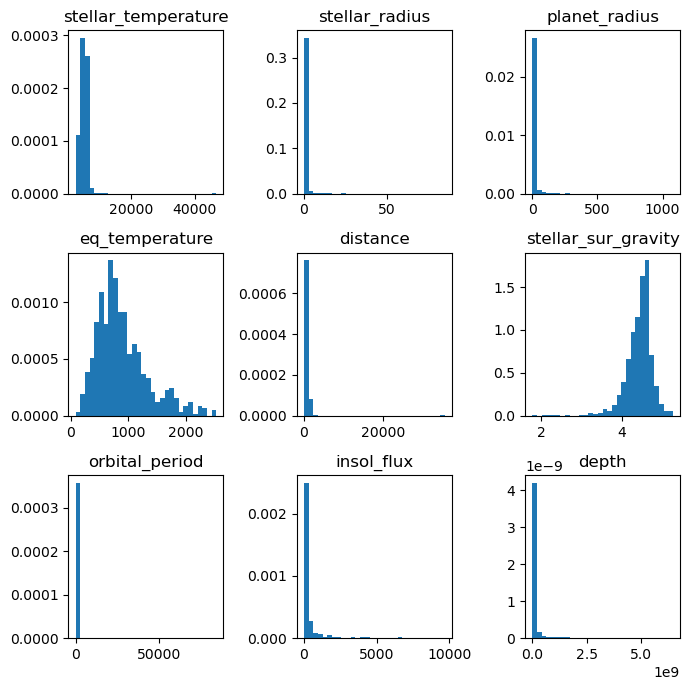

In [7]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)
ax[0,0].hist(k2_data.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')
ax[0,1].hist(k2_data.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')
ax[0,2].hist(k2_data.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')
ax[1,0].hist(k2_data.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')
ax[1,1].hist(k2_data[k2_data.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')
ax[1,2].hist(k2_data.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')
ax[2,0].hist(k2_data.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')
ax[2,1].hist(k2_data.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')
ax[2,2].hist(k2_data.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

In [8]:
dfx = k2_data.copy()
for coluna in colunas_dados_faltantes:
    dfx = impute_random(dfx,coluna)

In [9]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       3773 non-null   object 
 1   longitude_s          3773 non-null   object 
 2   longitude            3773 non-null   float64
 3   latitude_s           3773 non-null   object 
 4   latitude             3773 non-null   float64
 5   stellar_temperature  3773 non-null   float64
 6   stellar_radius       3773 non-null   float64
 7   planet_radius        3773 non-null   float64
 8   eq_temperature       3773 non-null   float64
 9   distance             3773 non-null   float64
 10  stellar_sur_gravity  3773 non-null   float64
 11  orbital_period       3773 non-null   float64
 12  insol_flux           3773 non-null   float64
 13  depth                3773 non-null   float64
dtypes: float64(11), object(3)
memory usage: 412.8+ KB


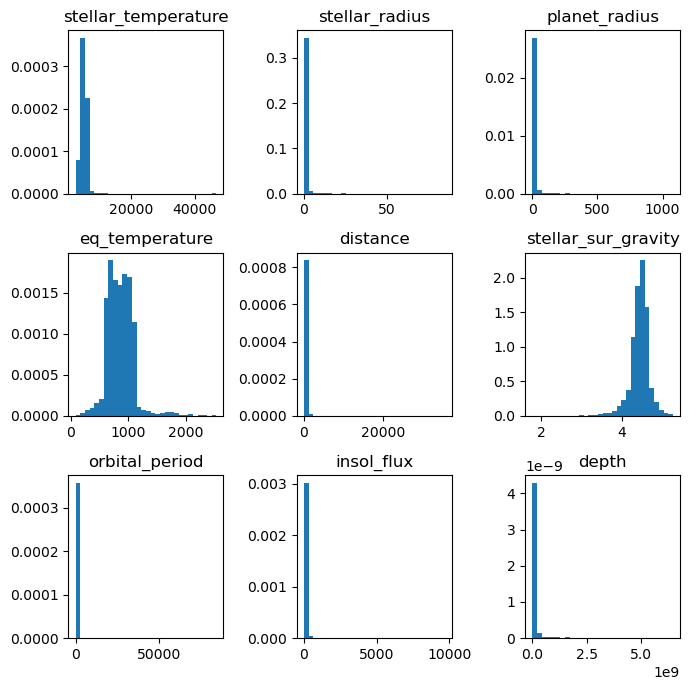

In [11]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)
ax[0,0].hist(dfx.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')
ax[0,1].hist(dfx.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')
ax[0,2].hist(dfx.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')
ax[1,0].hist(dfx.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')
ax[1,1].hist(dfx[dfx.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')
ax[1,2].hist(dfx.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')
ax[2,0].hist(dfx.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')
ax[2,1].hist(dfx.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')
ax[2,2].hist(dfx.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()